In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Укажите путь к папке с логами (например, последнего запуска)
log_dir = r"C:\Users\Ilya\Desktop\AES\code\ldpe_nn\logs_nn\2025-05-22_18-01-31"  # замените на свой run_time

# Загрузка лога
log_df = pd.read_csv(os.path.join(log_dir, "training_log.csv"))



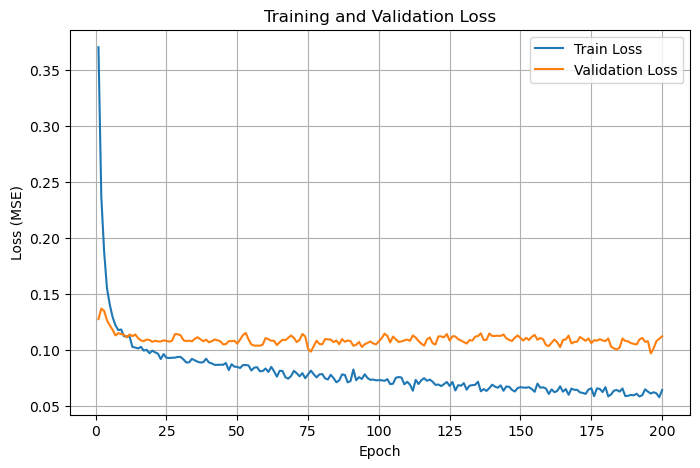

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(log_df['epoch'], log_df['train_loss'], label='Train Loss')
plt.plot(log_df['epoch'], log_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Загрузка массивов
y_true = np.load(os.path.join(log_dir, "y_true_orig.npy"))
y_pred = np.load(os.path.join(log_dir, "y_pred_orig.npy"))

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

y_cols = [
    'FRPRE_EXP_0','FRPRE_EXP_1','FRPRE_EXP_2','FRPRE_EXP_3','FRPRE_EXP_4',
    'FRPRE_EXP_5','FRPRE_EXP_6','FRPRE_EXP_7','FRPRE_EXP_8','FRPRE_EXP_9'
]



y_true shape: (50, 10)
y_pred shape: (50, 10)


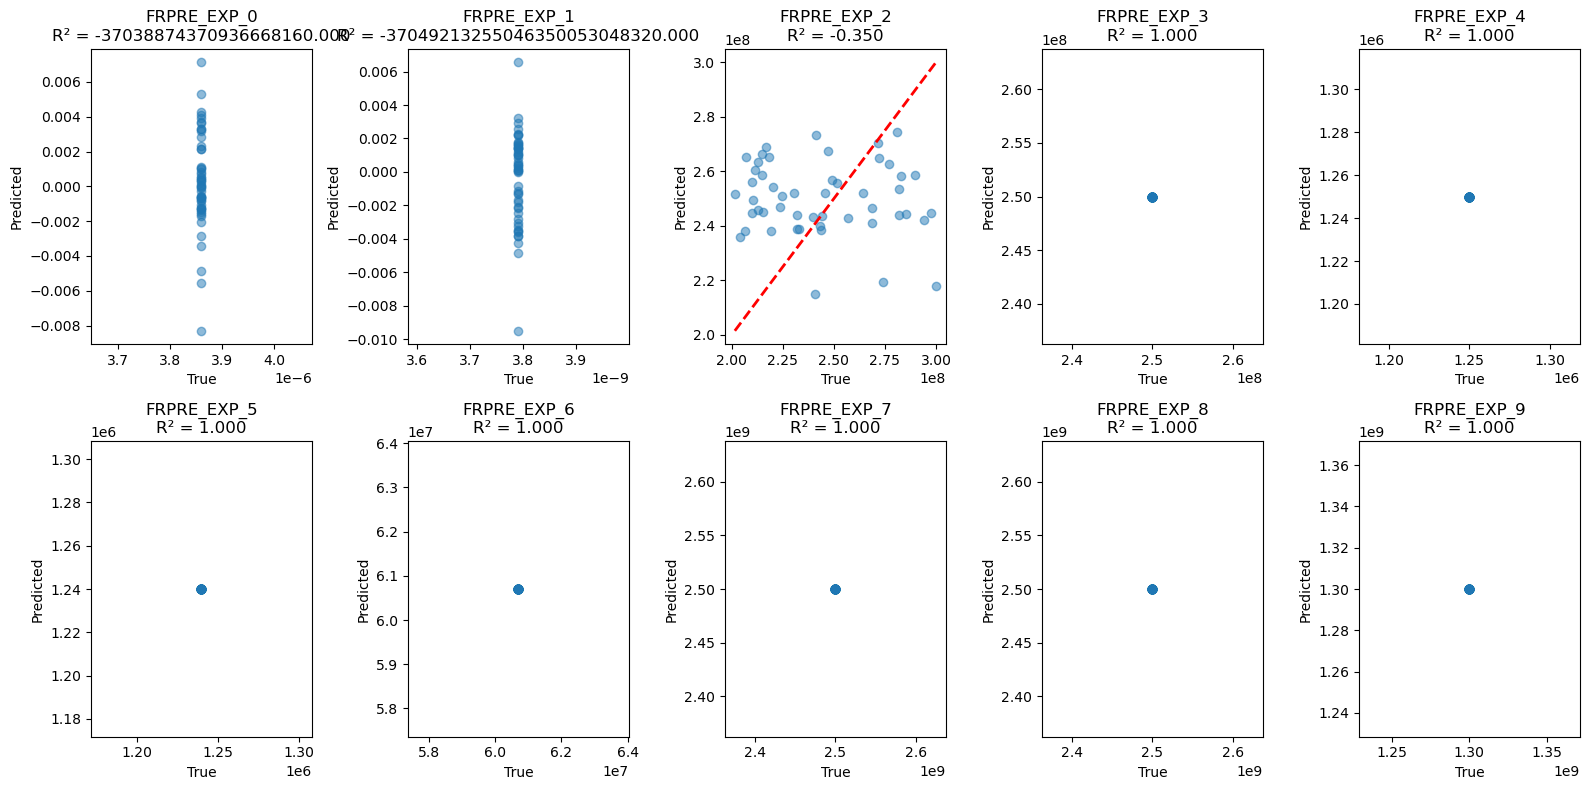

In [18]:
from sklearn.metrics import r2_score

n_targets = y_true.shape[1]
fig, axes = plt.subplots(2, (n_targets + 1) // 2, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(y_cols):
    ax = axes[i]
    ax.scatter(y_true[:, i], y_pred[:, i], alpha=0.5)
    ax.plot([y_true[:, i].min(), y_true[:, i].max()],
            [y_true[:, i].min(), y_true[:, i].max()], 'r--', lw=2)
    r2 = r2_score(y_true[:, i], y_pred[:, i])
    ax.set_xlabel("True")
    ax.set_ylabel("Predicted")
    ax.set_title(f"{col}\nR² = {r2:.3f}")

# Удалим пустые оси, если графиков меньше чем мест в сетке
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
